<a href="https://colab.research.google.com/github/kurealnum/dsrp-2025/blob/main/DSRP_Global_Debt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes
I do not aspire or plan to utilize all 10 of these datasets in my final project. I just included them all in my initialization so I would have plenty of options.

Just something for me to keep in mind: after I choose a dataset, are there any other datasets that I could utilize to provide more context about my original dataset?

# Chosen research idea

Can debt levels of neighboring countries improve predictions of debt levels of the U.S? For instance, can the central government debt levels predict the central government debt levels of the U.S?

*Thank you Manasa Kolavennu for helping me refine my original research idea.*

## Picking a research question

My research question should address an issue or a problem, outline various aspects of the study, and serve as a guiding point.

Remember that you can always change this as you go (as long as it's not a drastic change).

Be a skeptic and curious (how could this be misleading and what do I want to learn more about)

### Things to think about

What change/difference are you most interested in?

What result/finding would be most useful to someone interested in this topic?

### Things to look for/do
I want to look for/do...
- Gaps in data/understanding
- Populations/variables to focus on
- Being specific
- Being complex
- Categories to distinguish between
- Grouping data/variables

### Ways to ask a question

Compare: Is there a meaningful difference between 2 or more categorical variables, are there variations/patterns in time periods/regions
Classify: How well you can predict variables?

### Statement of purpose

Create a statement of purpose. The purpose of this study is to...
- Determine if how X
- Investigate X
- Classify X
- Predict X based on Y
- Some other way! These are just suggestions

# Installing packages

In [2]:
# We have to use python-calamine to load the (now deprecated) datasets below for some reason.
!pip install pandas
!pip install python-calamine
!pip install matplotlib
!pip install numpy

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.0/888.0 kB 12.5 MB/s eta 0:00:00


# Loading deprecated datasets

In [ ]:
# DEPRECATED DATASETS (see below)

# "loans" in the following variable names refers to loans *and* debt securities (context here: https://www.imf.org/external/datamapper/NFC_LS@GDD/SWE)
#
# "all" in the following variable names refers to all instruments (context here: https://www.imf.org/external/datamapper/HH_ALL@GDD/SWE)

# The following is for private debt
# Private debt, loans and debt securities
private_debt_loans_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/private_debt_loans.xls"
private_debt_loans_df = pd.read_excel(private_debt_loans_url, engine="calamine")

# Household debt, loans and debt securities
household_debt_loans_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/household_debt_loans.xls"
household_debt_loans_df = pd.read_excel(household_debt_loans_url, engine="calamine")

# Nonfinancial corporate debt, loans and debt securities
nfc_debt_loans_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/nfc_debt_loans.xls"
nfc_debt_loans_df = pd.read_excel(nfc_debt_loans_url, engine="calamine")

# Private debt, all instruments
private_debt_all_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/private_debt_all.xls"
private_debt_all_df = pd.read_excel(private_debt_all_url, engine="calamine")

# Household debt, all instruments
household_debt_all_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/household_debt_all.xls"
household_debt_all_df = pd.read_excel(household_debt_all_url, engine="calamine")

# Nonfinancial corporate debt, all instruments
nfc_debt_all_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/nfc_debt_all.xls"
nfc_debt_all_df = pd.read_excel(nfc_debt_all_url, engine="calamine")

# The following is for public debt
# Central Government Debt
central_govt_debt_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/central_govt_debt.xls"
central_govt_debt_df = pd.read_excel(central_govt_debt_url, engine="calamine")

# General Government Debt
general_govt_debt_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/general_govt_debt.xls"
general_govt_debt_df = pd.read_excel(general_govt_debt_url, engine="calamine")

# Nonfinancial Public Sector Debt
nonfinancial_public_sector_debt_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/nonfinancial_public_sector_debt.xls"
nonfinancial_public_sector_debt_df = pd.read_excel(nonfinancial_public_sector_debt_url, engine="calamine")

# Public Sector Debt
public_sector_debt_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/public_sector_debt.xls"
public_sector_debt_df = pd.read_excel(public_sector_debt_url, engine="calamine")

# Putting every dataframe (that is similar) in a dict will make our lives easier in the future.
dataframes = {
    "private_debt_loans_df": private_debt_loans_df,
    "household_debt_loans_df": household_debt_loans_df,
    "nfc_debt_loans_df": nfc_debt_loans_df,
    "private_debt_all_df": private_debt_all_df,
    "household_debt_all_df": household_debt_all_df,
    "nfc_debt_all_df": nfc_debt_all_df,
    "central_govt_debt_df": central_govt_debt_df,
    "general_govt_debt_df": general_govt_debt_df,
    "nonfinancial_public_sector_debt_df": nonfinancial_public_sector_debt_df,
    "public_sector_debt_df": public_sector_debt_df,
}

# Deprecated Section

This is the section containing my code and writing *before* I realized that we're only supposed to focus on the U.S.

Since we're here, let's go ahead and remove any possible duplicates.

In [ ]:
# Drop duplicates from each dataframe
for name, df in dataframes.items():
    dataframes[name] = df.drop_duplicates()

Row 0 and the last row are empty for all of our datasets, so let's remove that.

In [ ]:
# Slice out first and last rows from each dataframe
for name, df in dataframes.items():
    dataframes[name] = df.iloc[1:-1]

We also have quite a few "no data" strings littered through our dataset, so let's take care of those.

In [ ]:
# Not sure exactly what this is. Pandas gets very angry when using replace if this option is not set.
pd.set_option('future.no_silent_downcasting', True)

# Replace every instance of "no data" with a 0. This will very likely need to be changed in the future
for name, df in dataframes.items():
    dataframes[name] = df.replace("no data", 0)

The "numeric" values in our dataset are actually classified as pandas objects, not numeric values, so let's change that.

In [ ]:
# Convert all columns except the first one to float (via string) for each dataframe
for name, df in dataframes.items():
    dataframes[name].iloc[:, 1:] = df.iloc[:, 1:].astype(str).astype(float)

A lot of these datasets have contained "no data" values. We can remove anything that contains "no data", but we end up removing 90% of our rows. We could do this with our 9 other datasets and see if the results were any better, but they almost certainly wouldn't be. Thus, we're going to have to find a way to work with a lot of null values.

## Basic data investigation
In this section, I aim to answer:
- Is there anything abnormal about my data (aside from what I've already covered)?
- Could any replacement values be used?
- Can any of my pre-existing research ideas *not* be used?

In [ ]:
print(private_debt_loans_df.shape)
private_debt_loans_df.head()

(161, 75)


,"Private debt, loans and debt securities (Percent of GDP)",1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,3.637246,3.702463,3.37376,3.337243,3.13516,2.821018,2.569163,no data,no data,no data
2,Albania,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,47.04212,44.539943,43.179743,40.766139,36.655129,37.282139,41.177921,39.197219,35.517864,33.6777
3,Algeria,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,16.047006,18.824222,19.835773,21.425454,21.934189,22.347562,25.154343,21.826842,17.56565,no data
4,Argentina,66.646476,63.241907,67.335064,67.413434,72.982788,73.801149,69.848257,66.216713,61.550419,...,19.649266,21.444873,20.753004,24.894868,28.980003,28.283757,29.933264,22.879931,21.924343,34.904914


In [ ]:
print(household_debt_all_df.shape)
household_debt_loans_df.head()

(46, 75)


,"Household debt, loans and debt securities (Percent of GDP)",1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,0.6971,0.577473,0.648992,0.652998,0.669492,0.565135,0.544819,no data,no data,no data
2,Albania,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,10.729247,11.276374,11.273276,11.321095,11.137844,11.494039,12.603253,12.518278,12.154034,12.306866
3,Argentina,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,5.720705,6.352101,5.956233,6.914792,6.566565,5.374237,5.565194,4.531598,4.074481,4.035941
4,Australia,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,115.836043,120.927004,123.663605,122.895539,122.074697,118.821404,122.170264,117.363095,110.620272,109.813697


In [ ]:
print(nfc_debt_loans_df.shape)
nfc_debt_loans_df.head()

(88, 75)


,"Nonfinancial corporate debt, loans and debt securities (Percent of GDP)",1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,2.940147,3.12499,2.724768,2.684246,2.465668,2.255883,2.024344,no data,no data,no data
2,Albania,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,36.312873,33.263569,31.906467,29.445044,25.517285,25.788100,28.574667,26.67894,23.36383,21.370834
3,Argentina,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,13.92856,15.092772,14.79677,17.980076,22.413438,22.909521,24.368069,18.348334,17.849862,30.868973
4,Australia,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,70.919632,76.134018,75.07669,71.032354,71.459672,70.484350,69.179194,63.261723,59.828103,60.131153


In [ ]:
print(private_debt_all_df.shape)
private_debt_all_df.head()

(46, 75)


,"Private debt, all instruments (Percent of GDP)",1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,163.123627,162.002537,163.309825,163.395619,164.897666,162.593869,174.024111,176.024217,160.530742,no data
2,Belgium,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,247.714467,247.910063,272.058644,257.751996,259.331542,255.266984,264.054211,252.033844,243.07587,228.489317
3,Brazil,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,123.965079,132.848893,124.741105,76.737607,80.362517,84.653283,94.402647,92.064905,no data,no data
4,Bulgaria,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,248.578428,223.121366,215.172215,201.703268,198.726976,196.373980,200.946076,188.966111,175.491924,171.621415


In [ ]:
print(household_debt_all_df.shape)
household_debt_all_df.head()

(46, 75)


,"Household debt, all instruments (Percent of GDP)",1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,51.800096,51.639806,51.789669,51.153909,50.437857,50.472218,54.372066,53.266029,49.669589,no data
2,Belgium,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,59.606897,59.853108,60.595829,61.131365,61.288120,62.468471,67.429561,64.542694,62.296429,60.436527
3,Brazil,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,38.074989,38.751253,38.094733,28.694541,29.486599,32.589096,33.740013,34.017995,no data,no data
4,Bulgaria,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,30.265359,28.415883,27.44809,27.919041,28.132773,28.237271,30.219410,28.871254,26.913459,27.613012


In [ ]:
print(nfc_debt_all_df.shape)
nfc_debt_all_df.head()

(46, 75)


,"Nonfinancial corporate debt, all instruments (Percent of GDP)",1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,111.32353,110.362731,111.520156,112.241710,114.459809,112.121652,119.652045,122.758188,110.861153,no data
2,Belgium,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,188.10757,188.056954,211.462815,196.620631,198.043421,192.798513,196.624650,187.491151,180.779441,168.05279
3,Brazil,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,85.89009,94.097639,86.646372,48.043066,50.875918,52.064187,60.662634,58.04691,no data,no data
4,Bulgaria,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,218.313069,194.705483,187.724125,173.784227,170.594202,168.136709,170.726666,160.094858,148.578465,144.008403


In [ ]:
print(central_govt_debt_df.shape)
central_govt_debt_df.head()

(174, 75)


,Central Government Debt (Percent of GDP),1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,8.700291,9.154083,8.437266,7.99766,7.384413,6.34983,7.797235,no data,no data,no data
1,Albania,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,70.03,72.670075,72.380043,70.119933,67.610016,65.729866,74.299952,74.489915,64.459994,59.131403
2,Algeria,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,6.852797,7.731179,18.09443,24.015146,34.492665,40.881598,45.967375,55.134496,48.084933,48.618767
3,Angola,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,35.274186,50.38582,66.670005,60.492126,82.541362,101.372846,119.145419,74.292159,56.10816,73.682142
4,Antigua and Barbuda,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,91.878744,92.108117,83.055941,88.389158,84.332698,81.640002,100.524604,92.995378,81.977209,76.833172


In [ ]:
print(general_govt_debt_df.shape)
general_govt_debt_df.head()

(90, 75)


,General Government Debt (Percent of GDP),1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,71.992300,73.716336,73.324410,71.894783,69.472043,67.367669,75.772303,75.217741,65.545526,59.811263
2,Australia,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,34.026511,37.709407,40.588092,41.149017,41.695698,46.659304,56.998858,55.449865,50.263183,49.008847
3,Austria,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,84.047509,84.894296,82.840429,78.500538,74.082841,70.638796,82.947875,82.490091,78.40645,77.544998
4,Belarus,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,38.790605,53.006888,53.481630,53.159846,47.515236,40.999215,47.493317,41.18201,41.296746,40.719905


In [ ]:
print(nonfinancial_public_sector_debt_df.shape)
nonfinancial_public_sector_debt_df.head()

(17, 75)


,Nonfinancial Public Sector Debt (Percent of GDP),1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bolivia,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,37.602707,40.904668,46.489862,51.259946,53.075541,58.625507,77.971247,81.404931,80.125189,88.435788
2,Brazil,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,61.617149,71.729677,77.422191,82.744953,84.777046,87.118481,96.006839,88.934272,83.938835,84.675487
3,Cameroon,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,no data,31.620029,32.107996,36.538658,38.337367,41.599553,44.857538,46.784758,45.511617,43.442764
4,Czech Republic,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,53.722727,48.842992,44.693408,39.869976,36.724816,34.553737,no data,no data,no data,no data


In [ ]:
print(public_sector_debt_df.shape)
public_sector_debt_df.head()

(17, 70)


,Public Sector Debt (Percent of GDP),1955,1956,1957,1958,1959,1960,1961,1962,1963,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Czech Republic,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,81.142427,82.434473,88.637139,104.591524,98.802664,94.881532,no data,no data,no data,no data
2,Honduras,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,42.871198,42.274816,39.887612,43.026963,44.033731,44.145293,53.888209,52.101991,48.225348,40.77378
3,Indonesia,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,55.639609,57.020407,58.901375,61.591340,65.062484,63.876882,79.096867,79.211039,73.741074,75.991831
4,Mauritius,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,59.377896,61.709143,62.316250,61.358412,62.585317,63.746710,80.629976,88.099171,83.049268,78.72346


## Changes after basic investigation

After taking a peek at my datasets, there are a few things that I'm noticing:
- On all of my datasets, the first row is full of NaN values.
- A potentially good way to choose datasets would be to choose the datasets that have the most data (i.e., the most rows). That way, we have plenty of material to work with. This doesn't mean that we shouldn't ever consider other datasets though.

Let's go ahead and drop the NaN values below.

In [ ]:
private_debt_loans_df.head()

,"Private debt, loans and debt securities (Percent of GDP)",1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,3.637246,3.702463,3.37376,3.337243,3.13516,2.821018,2.569163,no data,no data,no data
2,Albania,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,47.04212,44.539943,43.179743,40.766139,36.655129,37.282139,41.177921,39.197219,35.517864,33.6777
3,Algeria,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,16.047006,18.824222,19.835773,21.425454,21.934189,22.347562,25.154343,21.826842,17.56565,no data
4,Argentina,66.646476,63.241907,67.335064,67.413434,72.982788,73.801149,69.848257,66.216713,61.550419,...,19.649266,21.444873,20.753004,24.894868,28.980003,28.283757,29.933264,22.879931,21.924343,34.904914


In [ ]:
private_debt_loans_df = private_debt_loans_df.dropna(ignore_index=True)
private_debt_loans_df.head()

,"Private debt, loans and debt securities (Percent of GDP)",1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,3.637246,3.702463,3.37376,3.337243,3.13516,2.821018,2.569163,no data,no data,no data
1,Albania,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,47.04212,44.539943,43.179743,40.766139,36.655129,37.282139,41.177921,39.197219,35.517864,33.6777
2,Algeria,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,16.047006,18.824222,19.835773,21.425454,21.934189,22.347562,25.154343,21.826842,17.56565,no data
3,Argentina,66.646476,63.241907,67.335064,67.413434,72.982788,73.801149,69.848257,66.216713,61.550419,...,19.649266,21.444873,20.753004,24.894868,28.980003,28.283757,29.933264,22.879931,21.924343,34.904914
4,Australia,no data,no data,no data,52.786963,56.930105,61.553013,57.471254,56.425048,56.966761,...,186.755675,197.061022,198.740295,193.927893,193.534369,189.305754,191.349458,180.624818,170.448374,169.944851


That seems to work fine, so let's go ahead and do this for all of the other datasets.

In [ ]:
# Private debt dataframes
# private_debt_loans_df = private_debt_loans_df.dropna().reset_index(drop=True) -- We already did this!
household_debt_loans_df = household_debt_loans_df.dropna().reset_index(drop=True)
nfc_debt_loans_df = nfc_debt_loans_df.dropna().reset_index(drop=True)
private_debt_all_df = private_debt_all_df.dropna().reset_index(drop=True)
household_debt_all_df = household_debt_all_df.dropna().reset_index(drop=True)
nfc_debt_all_df = nfc_debt_all_df.dropna().reset_index(drop=True)

# Public debt dataframes
central_govt_debt_df = central_govt_debt_df.dropna().reset_index(drop=True)
general_govt_debt_df = general_govt_debt_df.dropna().reset_index(drop=True)
nonfinancial_public_sector_debt_df = nonfinancial_public_sector_debt_df.dropna().reset_index(drop=True)
public_sector_debt_df = public_sector_debt_df.dropna().reset_index(drop=True)


Moving on, I plan to choose a single dataset to get started with. With that datset, I intend to:
- ~Remove any duplicate rows~
- ~Remove any rows with NaN/null values in them~
- ~Check for outliers. A box plot might be a good idea.~
- Normalize/standardize data (this may not be necessary)
- Check for correlations (this is also not "necessary" unless we create new data points by extrapolating, which may very well be what we do).

Crossed out items are things that have already been done, either before or after this cell.

## Exploratory Data Analysis

Let's start by checking the output of `describe()` for central government debt.

In [ ]:
# Is there a better variable name to use than tmp? Maybe? Maybe not.

# Remove first descriptive column, then convert to float.
dataframes["central_govt_debt_df"].drop(central_govt_debt_df.columns[0], axis=1).describe()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,174.0,174.0,174.0,174.0,174.0,174.0,174.0,174.0,174.0,174.0,...,174.0,174.0,174.0,174.0,174.0,174.0,174.0,174.0,174.0,174.0
unique,31.0,33.0,33.0,33.0,34.0,34.0,34.0,34.0,33.0,34.0,...,173.0,173.0,173.0,173.0,172.0,171.0,169.0,167.0,165.0,157.0
top,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,144.0,142.0,142.0,142.0,141.0,141.0,141.0,141.0,142.0,141.0,...,2.0,2.0,2.0,2.0,3.0,4.0,6.0,8.0,10.0,18.0


Let's also take a look at the graph of mean and standard deviation of the data collected for the central government debt from 1950 to 2023.

In [ ]:
plt.plot(tmp.mean())
plt.xlabel("Years")
plt.ylabel("Debt (as a percent of GDP)")
plt.title("Mean Central Government Debt by year")
plt.show()

plt.plot(tmp.std())
plt.xlabel("Years")
plt.ylabel("STD of Debt (as a percent of GDP)")
plt.title("STD of Central Government Debt by year")
plt.show()

Standard deviation seems to follow a similar trend to mean, which could be interesting.

Next, I'd like to check for outliers for central government debt.

In [ ]:
plt.rcParams["figure.figsize"] = (14, 7)

central_govt_debt_boxplot_data = []
years = central_govt_debt_df.drop(central_govt_debt_df.columns[0], axis=1)

for column in years:
  x = central_govt_debt_df[column]
  x.replace("no data", pd.NA, inplace=True)
  x.dropna(inplace=True)
  central_govt_debt_boxplot_data.append(x)

plt.boxplot(central_govt_debt_boxplot_data, tick_labels = years.columns)
plt.xticks(rotation=90)
plt.xlabel("Years (1950-2023)")
plt.ylabel("Debt (as a percent of GDP)")
plt.title("Analysis of outliers for yearly central government debt for participating countries")
plt.show()

This seems super interesting, but it doesn't tell us that much. Just because there are more outliers from ~1990 - ~2010 doesn't mean that something crazy happened. Maybe countries that routinely had outliers provided data to the dataset during that time period, and for whatever reason they don't anymore. To help answer this, let's take a look at the number of countries that provided data every year.

In [ ]:
central_govt_debt_num_countries = []
years = central_govt_debt_df.drop(central_govt_debt_df.columns[0], axis=1)

for column in years:
  x = central_govt_debt_df[column]
  x.replace("no data", pd.NA, inplace=True)
  x.dropna(inplace=True)
  central_govt_debt_num_countries.append(len(x))

plt.plot(years.columns, central_govt_debt_num_countries)
plt.xlabel("Years")
plt.ylabel("# of countries that contributed data")
plt.title("# of countries that contributed data to the Global Debt Database every year")
plt.show()

This is interesting, but it doesn't really help us. After creating this chart, I realized that there's not really an easy way to determine if adding certain countries caused that spike in outliers. Additionally, since this doesn't directly align with my research question, I don't see it as a topic worth pursuing.

# Loading main dataset

In [4]:
# US dataset
us_debt_database_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/US_DebtDatabase.csv"
us_debt_database_df = pd.read_csv(us_debt_database_url)

In [5]:
us_debt_database_df.columns = us_debt_database_df.iloc[1]
us_debt_database_df.drop(0, axis=0, inplace=True)
us_debt_database_df.drop(1, axis=0, inplace=True)

# Exploratory data analysis

Let's start with `.head()`, `.info()`, `.describe()`, and `.corr()`.

In [6]:
us_debt_database_df.head()

1,Year,"Total private debt, \nall instruments\n(percent of GDP)","Total private debt, \nloans and debt securities\n(percent of GDP)","Household debt, all instruments\n(percent of GDP)","Household debt, loans and debt securities\n(percent of GDP)","Non-financial corporations debt, all instruments\n(percent of GDP)","Non-financial corporations debt, loans and debt securities\n(percent of GDP)",Public sector debt\n(percent of GDP),Nonfinancial public sector debt\n(percent of GDP),General government debt\n(percent of GDP),Central government debt\n(percent of GDP),Nominal gross domestic product\n(billions)
2,1950,75.83,55.31,25.48,24.80,50.34,30.51,NaN,NaN,83.13,78.20,301.78
3,1951,72.69,53.66,24.52,23.91,48.17,29.75,NaN,NaN,72.96,68.20,348.99
4,1952,88.24,56.56,26.60,25.98,61.64,30.58,NaN,NaN,72.53,66.34,368.03
5,1953,88.05,58.02,28.43,27.79,59.62,30.22,NaN,NaN,71.75,64.60,389.15
6,1954,106.06,62.57,31.54,30.86,74.52,31.71,NaN,NaN,73.57,64.96,390.28


In [7]:
us_debt_database_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 2 to 75
Data columns (total 12 columns):
 #   Column                                                                       Non-Null Count  Dtype 
---  ------                                                                       --------------  ----- 
 0   Year                                                                         74 non-null     object
 1   Total private debt, 
all instruments
(percent of GDP)                        74 non-null     object
 2   Total private debt, 
loans and debt securities
(percent of GDP)              74 non-null     object
 3   Household debt, all instruments
(percent of GDP)                             74 non-null     object
 4   Household debt, loans and debt securities
(percent of GDP)                   74 non-null     object
 5   Non-financial corporations debt, all instruments
(percent of GDP)            74 non-null     object
 6   Non-financial corporations debt, loans and debt secu

Public sector debt and nonfiancial public sector debt are completely null. Everything else has data.

With that, let's go ahead and remove those two columns.

In [8]:
us_debt_database_df.columns

Index(['Year', 'Total private debt, \nall instruments\n(percent of GDP)',
       'Total private debt, \nloans and debt securities\n(percent of GDP)',
       'Household debt, all instruments\n(percent of GDP)',
       'Household debt, loans and debt securities\n(percent of GDP)',
       'Non-financial corporations debt, all instruments\n(percent of GDP)',
       'Non-financial corporations debt, loans and debt securities\n(percent of GDP)',
       'Public sector debt\n(percent of GDP)',
       'Nonfinancial public sector debt\n(percent of GDP)',
       'General government debt\n(percent of GDP)',
       'Central government debt\n(percent of GDP)',
       'Nominal gross domestic product\n(billions)'],
      dtype='object', name=1)

In [9]:
# Rename columns to make our lives easier
us_debt_database_df.columns = [
    "Year",
    "Total Private Debt, All Instruments",
    "Total Private Debt, Loans and Debt Securities",
    "Household Debt, All Instruments",
    "Household Debt, Loans and Debt Securities",
    "Non-Financial Corporations Debt, All Instruments",
    "Non-Financial Corporations Debt, Loans and Debt Securities",
    "Public sector debt",
    "Nonfinancial public sector debt",
    "General Government Debt",
    "Central Government Debt",
    "Nominal Gross Domestic Product (Billions)"
]

In [10]:
us_debt_database_df.drop("Public sector debt", axis = 1, inplace=True)
us_debt_database_df.drop("Nonfinancial public sector debt", axis=1, inplace=True)
us_debt_database_df.reset_index(drop=True, inplace=True)

In [11]:
us_debt_database_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   Year                                                        74 non-null     object
 1   Total Private Debt, All Instruments                         74 non-null     object
 2   Total Private Debt, Loans and Debt Securities               74 non-null     object
 3   Household Debt, All Instruments                             74 non-null     object
 4   Household Debt, Loans and Debt Securities                   74 non-null     object
 5   Non-Financial Corporations Debt, All Instruments            74 non-null     object
 6   Non-Financial Corporations Debt, Loans and Debt Securities  74 non-null     object
 7   General Government Debt                                     74 non-null     object
 8   Central Gove

There we go!

The other interesting thing that `.info()` tells us is that all of our numeric values are treated as objects, not ints. Let's change that.

In [12]:
us_debt_database_df = us_debt_database_df.astype(float)

In [13]:
us_debt_database_df.describe()

,Year,"Total Private Debt, All Instruments","Total Private Debt, Loans and Debt Securities","Household Debt, All Instruments","Household Debt, Loans and Debt Securities","Non-Financial Corporations Debt, All Instruments","Non-Financial Corporations Debt, Loans and Debt Securities",General Government Debt,Central Government Debt,Nominal Gross Domestic Product (Billions)
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,1986.500000,172.237838,115.475000,60.594730,59.284595,111.643649,56.191081,68.847568,54.685405,7447.523243
std,21.505813,40.509385,33.423377,20.095546,19.664633,22.407240,14.811533,23.021020,21.943376,7470.270145
min,1950.000000,72.690000,53.660000,24.520000,23.910000,48.170000,29.750000,41.110000,27.510000,301.780000
25%,1968.250000,147.465000,90.600000,46.002500,44.945000,101.847500,44.680000,51.267500,39.470000,952.012500
50%,1986.500000,167.310000,119.035000,58.375000,57.330000,108.180000,56.560000,63.890000,48.355000,4717.440000
75%,2004.750000,215.007500,150.562500,77.215000,75.460000,126.250000,66.567500,72.975000,64.870000,12833.695000
max,2023.000000,238.750000,170.860000,100.590000,98.740000,158.280000,86.330000,132.930000,116.880000,27720.730000


In [14]:
us_debt_database_df.corr()

,Year,"Total Private Debt, All Instruments","Total Private Debt, Loans and Debt Securities","Household Debt, All Instruments","Household Debt, Loans and Debt Securities","Non-Financial Corporations Debt, All Instruments","Non-Financial Corporations Debt, Loans and Debt Securities",General Government Debt,Central Government Debt,Nominal Gross Domestic Product (Billions)
Year,1.000000,0.938104,0.971111,0.918511,0.917798,0.872252,0.972887,0.651383,0.549997,0.937254
"Total Private Debt, All Instruments",0.938104,1.000000,0.967404,0.947594,0.947701,0.958073,0.924843,0.583333,0.459689,0.880299
"Total Private Debt, Loans and Debt Securities",0.971111,0.967404,1.000000,0.977306,0.977122,0.872495,0.959325,0.566803,0.442965,0.886044
"Household Debt, All Instruments",0.918511,0.947594,0.977306,1.000000,0.999958,0.816326,0.877810,0.520364,0.385812,0.834130
"Household Debt, Loans and Debt Securities",0.917798,0.947701,0.977122,0.999958,1.000000,0.816558,0.877338,0.518532,0.384102,0.833947
"Non-Financial Corporations Debt, All Instruments",0.872252,0.958073,0.872495,0.816326,0.816558,1.000000,0.884784,0.587917,0.485050,0.843413
"Non-Financial Corporations Debt, Loans and Debt Securities",0.972887,0.924843,0.959325,0.877810,0.877338,0.884784,1.000000,0.590604,0.489618,0.892241
General Government Debt,0.651383,0.583333,0.566803,0.520364,0.518532,0.587917,0.590604,1.000000,0.985608,0.835341
Central Government Debt,0.549997,0.459689,0.442965,0.385812,0.384102,0.485050,0.489618,0.985608,1.000000,0.766320
Nominal Gross Domestic Product (Billions),0.937254,0.880299,0.886044,0.834130,0.833947,0.843413,0.892241,0.835341,0.766320,1.000000


Now that we've gotten a brief overview of what our dataset looks like, let's analyze some of it.

We'll utilize a box plot first, but we're going to need to normalize our data. We'll try two methods of normalizing data.

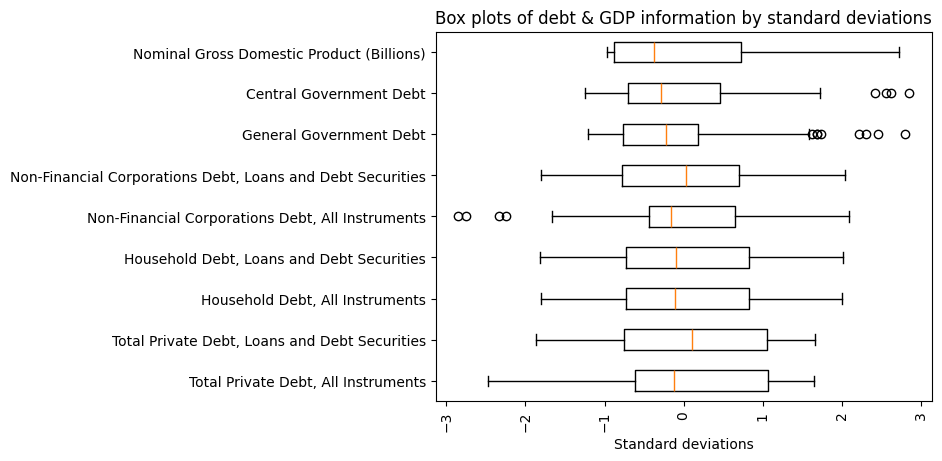

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(us_debt_database_df)
normalized_df = pd.DataFrame(scaled_data, columns=us_debt_database_df.columns).drop("Year", axis=1)

plt.boxplot(normalized_df, tick_labels=normalized_df.columns, orientation="horizontal")
plt.xticks(rotation=90)
plt.xlabel("Standard deviations")
plt.title("Box plots of debt & GDP information by standard deviations")
plt.show()

Our other "method" of normalizing data will be simply removing the column that causes us problems: nominal GDP.

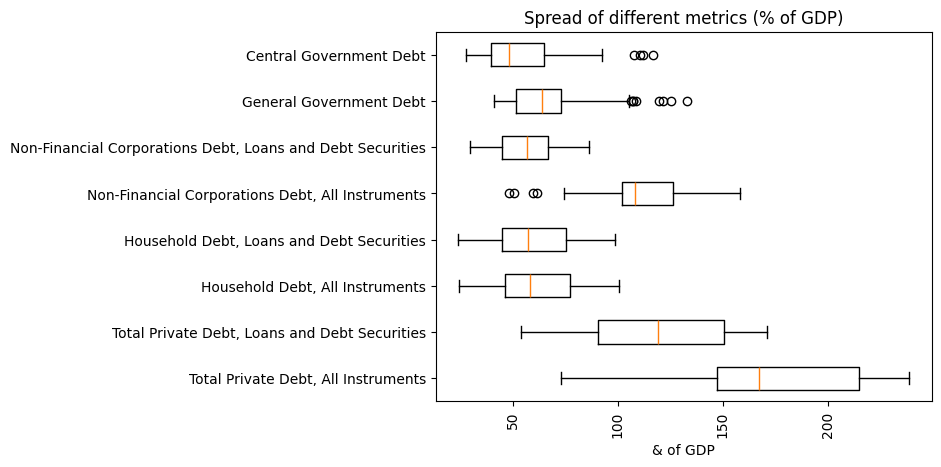

In [16]:
tmp_df = us_debt_database_df.drop(columns=["Year", "Nominal Gross Domestic Product (Billions)"])

plt.boxplot(tmp_df, tick_labels=tmp_df.columns, orientation="horizontal")
plt.xticks(rotation=90)
plt.xlabel("& of GDP")
plt.title("Spread of different metrics (% of GDP)")
plt.show()

# Other datasets

I'm focusing my research on the U.S., but I still want debt information about Canada and Mexico, so let's grab their datasets and clean them.

## Canada dataset

In [43]:
canada_debt_database_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/Canada_DebtDatabase.csv"
canada_debt_database_df = pd.read_csv(canada_debt_database_url)

In [44]:
# Set names of columns
canada_debt_database_df.columns = canada_debt_database_df.iloc[1]

# Drop first two rows
canada_debt_database_df.drop(0, axis=0, inplace=True)
canada_debt_database_df.drop(1, axis=0, inplace=True)

In [45]:
# Format names of columns
canada_debt_database_df.columns = [
    "Year",
    "Total Private Debt, All Instruments",
    "Total Private Debt, Loans and Debt Securities",
    "Household Debt, All Instruments",
    "Household Debt, Loans and Debt Securities",
    "Non-Financial Corporations Debt, All Instruments",
    "Non-Financial Corporations Debt, Loans and Debt Securities",
    "Public sector debt",
    "Nonfinancial public sector debt",
    "General Government Debt",
    "Central Government Debt",
    "Nominal Gross Domestic Product (Billions)"
]

In [46]:
canada_debt_database_df = canada_debt_database_df.astype(float)

## Mexico dataset

In [34]:
mexico_debt_database_url = "https://github.com/kurealnum/dsrp-2025/raw/refs/heads/main/Global%20Debt%20Data/Mexico_DebtDatabase.csv"
mexico_debt_database_df = pd.read_csv(mexico_debt_database_url)

In [35]:
# Set names of columns
mexico_debt_database_df.columns = mexico_debt_database_df.iloc[1]

# Drop first two rows
mexico_debt_database_df.drop(0, axis=0, inplace=True)
mexico_debt_database_df.drop(1, axis=0, inplace=True)

In [36]:
# Format names of columns
mexico_debt_database_df.columns = [
    "Year",
    "Total Private Debt, All Instruments",
    "Total Private Debt, Loans and Debt Securities",
    "Household Debt, All Instruments",
    "Household Debt, Loans and Debt Securities",
    "Non-Financial Corporations Debt, All Instruments",
    "Non-Financial Corporations Debt, Loans and Debt Securities",
    "Public sector debt",
    "Nonfinancial public sector debt",
    "General Government Debt",
    "Central Government Debt",
    "Nominal Gross Domestic Product (Billions)"
]

In [37]:
mexico_debt_database_df = mexico_debt_database_df.astype(float)

# Correlations between variables

My research question asks if debt levels of neighboring countries can improve predictions of debt levels of the U.S. Looking at some correlations here would be quite useful. Since my research question references central government debt as an example, let's see if there's any correlation there.

In [53]:
cent_govt_debt_df = pd.DataFrame(
    {
        "Year": us_debt_database_df[
            "Year"
        ],
        "American Central Government Debt": us_debt_database_df[
            "Central Government Debt"
        ],
        "Canadian Central Government Debt": canada_debt_database_df[
            "Central Government Debt"
        ],
        "Mexican Central Government Debt": mexico_debt_database_df[
            "Central Government Debt"
        ],
    }
)

In [54]:
cent_govt_debt_df.corr()

,Year,American Central Government Debt,Canadian Central Government Debt,Mexican Central Government Debt
Year,1.000000,0.549997,-0.505387,0.763017
American Central Government Debt,0.549997,1.000000,-0.207800,0.481420
Canadian Central Government Debt,-0.505387,-0.207800,1.000000,0.129077
Mexican Central Government Debt,0.763017,0.481420,0.129077,1.000000


There's not a strong correlation there, but let's graph it anyways.

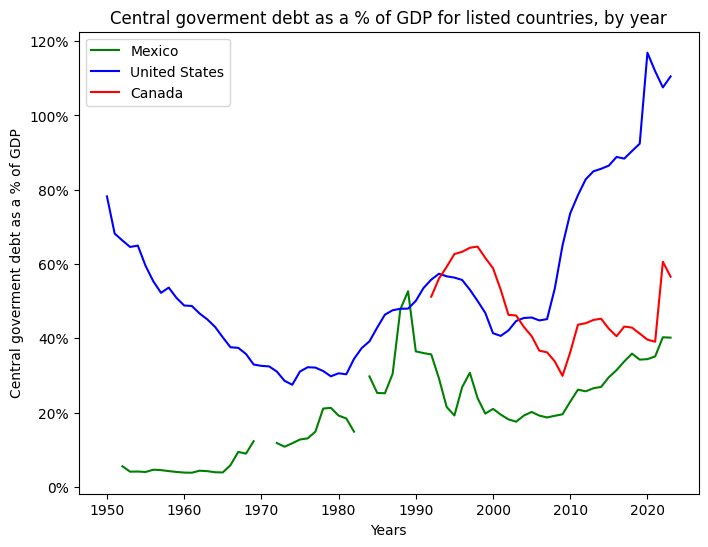

In [75]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(figsize=(8,6))
ax = fig.subplots()
ax.yaxis.set_major_formatter(formatter=PercentFormatter())

plt.plot(cent_govt_debt_df["Year"], cent_govt_debt_df["Mexican Central Government Debt"], label="Mexico", color = "green")
plt.plot(cent_govt_debt_df["Year"], cent_govt_debt_df["American Central Government Debt"], label="United States", color = "blue")
plt.plot(cent_govt_debt_df["Year"], cent_govt_debt_df["Canadian Central Government Debt"], label="Canada", color = "red")
plt.xlabel("Years")
plt.ylabel("Central goverment debt as a % of GDP")
plt.title("Central goverment debt as a % of GDP for listed countries, by year")
plt.legend()
plt.show()

You'll notice that some data is cut off here. This simply represents areas where values are missing. We can view a graph without any missing values by only looking at values past the year 1992.

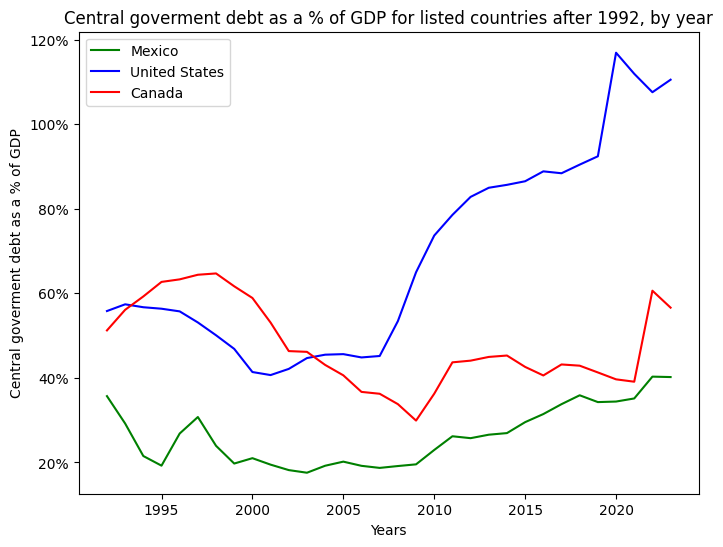

In [81]:
from matplotlib.ticker import PercentFormatter

cent_govt_debt_df_tmp = cent_govt_debt_df.drop(cent_govt_debt_df[cent_govt_debt_df["Year"] < 1992].index)

fig = plt.figure(figsize=(8,6))
ax = fig.subplots()
ax.yaxis.set_major_formatter(formatter=PercentFormatter())

plt.plot(cent_govt_debt_df_tmp["Year"], cent_govt_debt_df_tmp["Mexican Central Government Debt"], label="Mexico", color = "green")
plt.plot(cent_govt_debt_df_tmp["Year"], cent_govt_debt_df_tmp["American Central Government Debt"], label="United States", color = "blue")
plt.plot(cent_govt_debt_df_tmp["Year"], cent_govt_debt_df_tmp["Canadian Central Government Debt"], label="Canada", color = "red")
plt.xlabel("Years")
plt.ylabel("Central goverment debt as a % of GDP")
plt.title("Central goverment debt as a % of GDP for listed countries after 1992, by year")
plt.legend()
plt.show()

# TODO

- Machine learning models?